import libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""
Project: Titanic Survival Analysis
Author: Shiping Yu, Tianhao Wang, Bohan Yang, Andrew Xu, Sainath sunkara

Description:
This project analyzes the Titanic dataset to identify key factors influencing passenger survival rates.
The dataset includes demographic information, ticket class, and survival status of the passengers.

Key Questions to Address:
1. What is the overall survival rate?
2. How does gender influence survival rates?
3. What are the survival rates for different passenger classes?
4. Does age impact the likelihood of survival?
5. Is there a relationship between the port of embarkation and survival rate?
6. Does the number of family members aboard influence survival?
"""

# Step 1: Load the dataset

In [4]:
data = pd.read_csv('titanic.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# Step 2: Data Cleaning

In [5]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.drop(columns=['Cabin'], inplace=True)
data.drop_duplicates(inplace=True)

print(data.isnull().sum())
data.to_csv('cleaned_titanic.csv', index=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Step 3: Exploratory Data Analysis (EDA)

# Visualize survival count

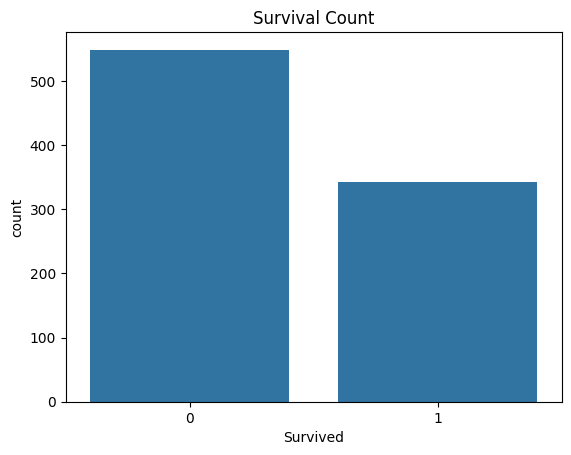

In [6]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

# Visualize passenger class distribution

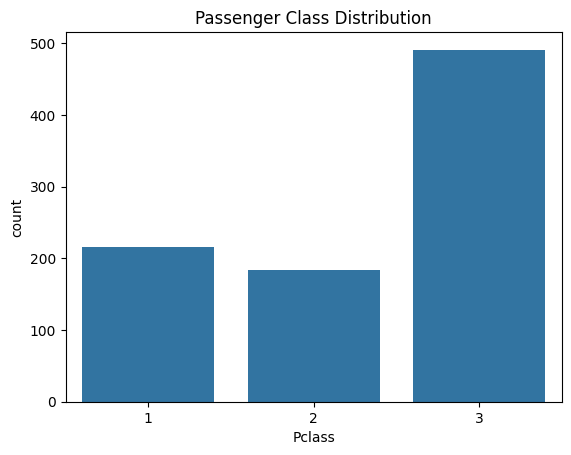

In [7]:
sns.countplot(x='Pclass', data=data)
plt.title('Passenger Class Distribution')
plt.show()

# Visualize gender distribution

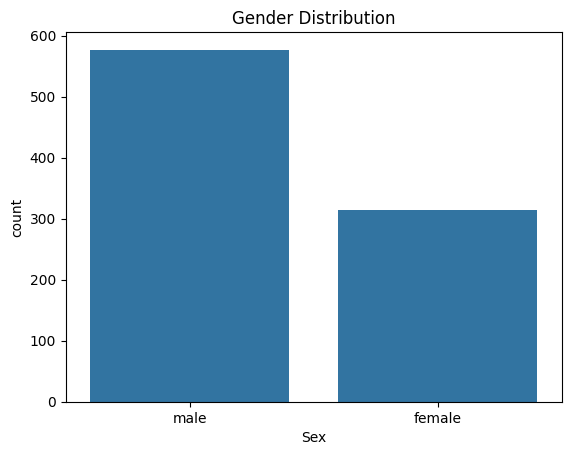

In [8]:
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.show()

# Visualize embarkation port distribution

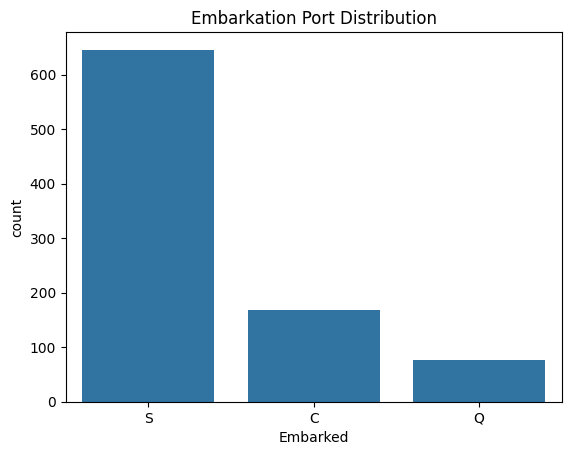

In [9]:
sns.countplot(x='Embarked', data=data)
plt.title('Embarkation Port Distribution')
plt.show()

# Visualize age distribution

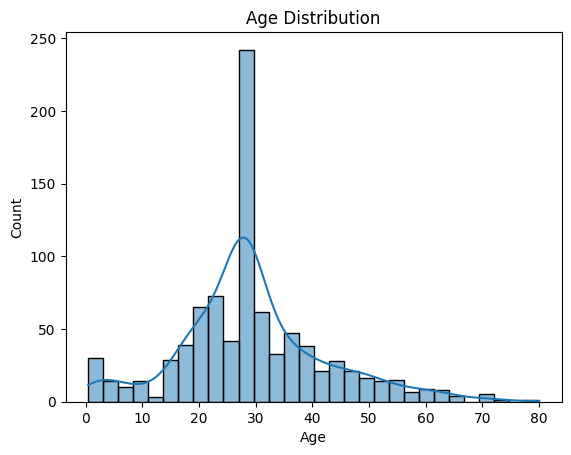

In [10]:
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Visualize fare distribution

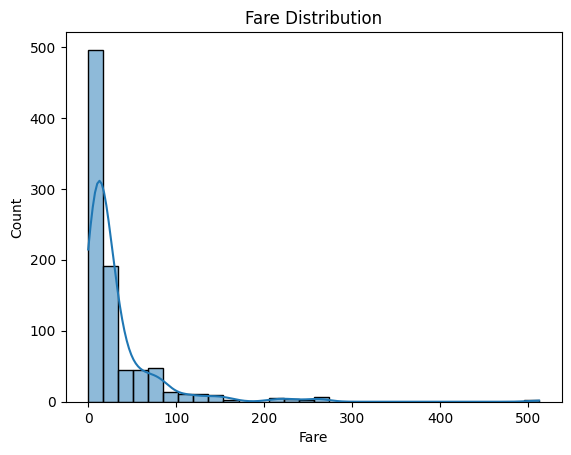

In [11]:
sns.histplot(data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

# Survival rate by gender

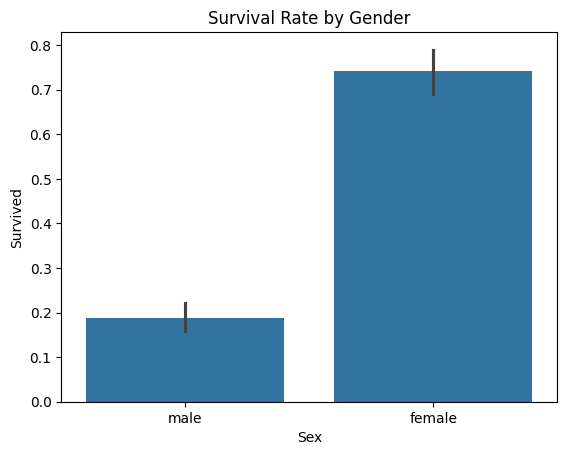

In [12]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by passenger class

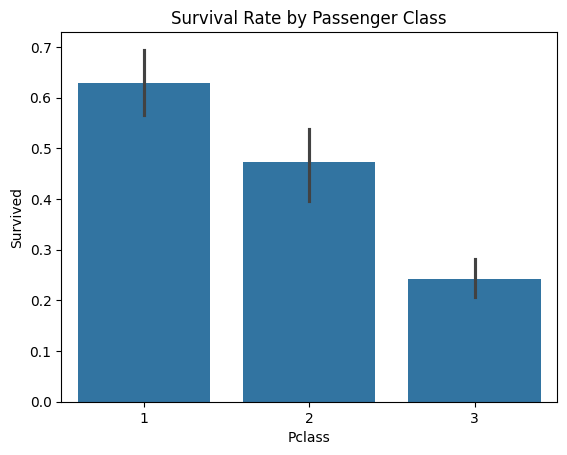

In [13]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by embarkation port

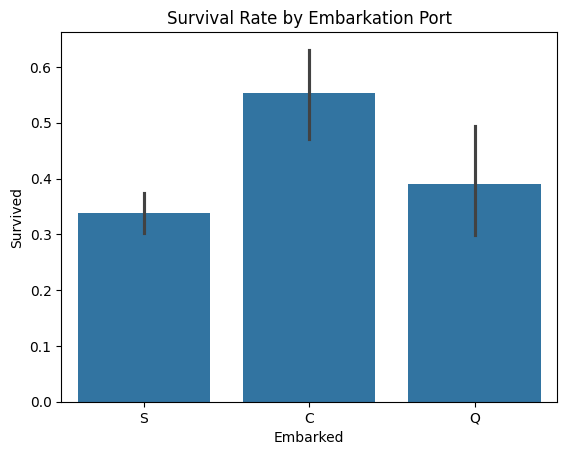

In [14]:
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Embarkation Port')
plt.show()

# Step 4: Correlation Matrix

# Compute correlation matrix (only numeric columns)

In [15]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap

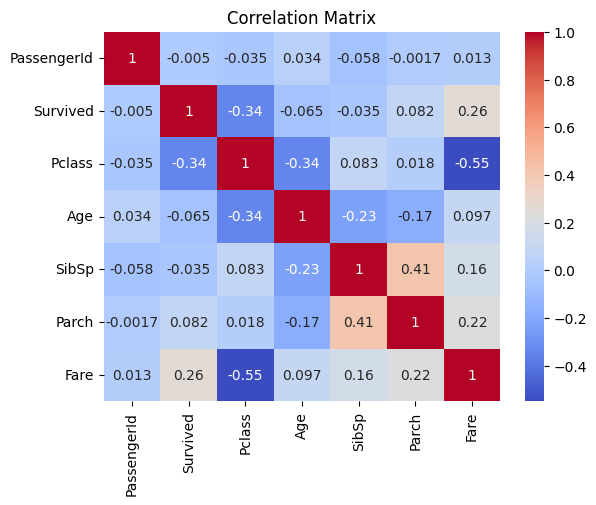

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Import required libraries

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data for model

In [18]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex' column
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Encode 'Embarked' column

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Split data into train and test sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Make predictions

In [21]:
y_pred = model.predict(X_test)

# Evaluate the model

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]
